# Modeling Pat Adoption with RandomForestClassifier

This notebook will use the Random Trees Algorithm for prediction of pet's adoption speed
- Metrics: Accuracy and Cohen's Weighted Kappa 
- Comparing model performance for cats and dogs combined vs. seperately. We will evaluate the overall accuracy for cats and dogs with 
  acc_combined_model = ((acc_cats * number_cats) + (acc_dogs * number_dogs))/(number_cats + number_dogs)

In [139]:
# importing necessary libraries and dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, cohen_kappa_score 
from sklearn.metrics import classification_report, confusion_matrix

# import custom functions
from custom_functions import our_metrics, get_kappa, cat_dog_metrics
from model_functions import model_hyperparams

# display options
pd.set_option('display.max_rows', None)





# Modeling Entire Data Set

### Import processed data - Cats and Dogs Combined

In [140]:
# import features
X_train = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_minmax_scaled_processed.csv')
X_test = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_minmax_scaled_processed.csv')

# import target
y_train = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train.csv')
y_test = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test.csv')

# turn target df into 1D-array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()                  

# 

### Random Forest Default Model - Entire Data Set

In [141]:
# instantiate and fit the default RFC on all features
rf_def = RandomForestClassifier()
rf_def.fit(X_train, y_train)

# predict train-target
rf_def_y_train_pred = rf_def.predict(X_train)
# predict test-target
rf_def_y_test_pred = rf_def.predict(X_test)

# Average number of nodes and depths of trees in the forest
n_nodes = []
depths = []

for single_tree in rf_def.estimators_:
    n_nodes.append(single_tree.tree_.node_count)
    depths.append(single_tree.tree_.max_depth)

print('__________________________________')
print(f'Average number of nodes in the forest: {int(np.mean(n_nodes))}')
print('__________________________________')
print(f'Average depth trees in the forest: {int(np.mean(depths))}')
print(' ')
print(' ')

model_hyperparams(rf_def)

__________________________________
Average number of nodes in the forest: 8145
__________________________________
Average depth trees in the forest: 27
 
 


,set hyperparameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


*** Model Evaluation: Predicting Train-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9904
_____________________
Weighted Quadratic Kappa: 0.9916


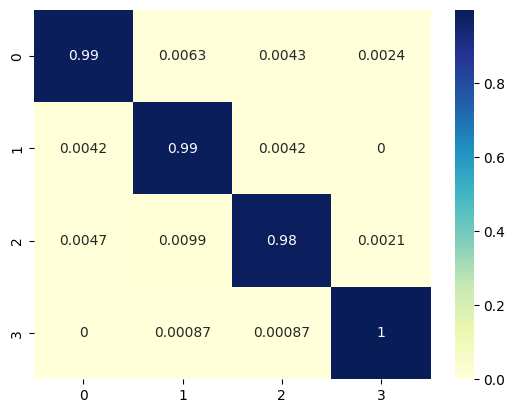

In [142]:
# Metrics predicting Train-Target
print('*** Model Evaluation: Predicting Train-Labels ***')
our_metrics(y_train, rf_def_y_train_pred)

*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.371
_____________________
Weighted Quadratic Kappa: 0.256


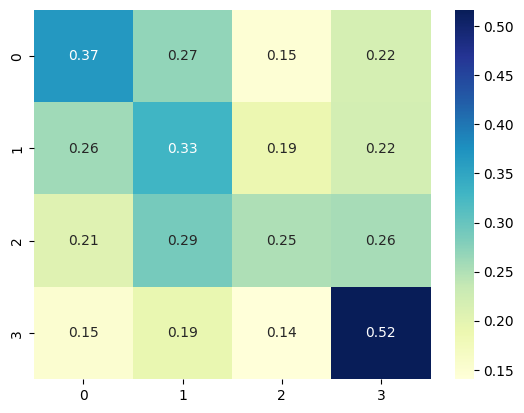

In [143]:
# Metrics predicting Test-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_test, rf_def_y_test_pred)

### RF Random Grid Search Accuracy - Entire Data Set

In [144]:
# Hyperparameter grid based on hyperparameters of the default model for best accuracy:

# setting hyperparameter grid:
param_grid = {
    'n_estimators': [500],
    'max_depth': [None] + list(np.arange(10, 28)),
    'max_features': [None] + list(np.arange(1,5)),
    'min_samples_split': np.linspace(20, 200, 10).astype(int),
    'min_samples_leaf': np.linspace(10, 100, 10).astype(int),
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model for best accuracy_score and 250 fits:
rf_rgs_acc = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'accuracy', cv = 5, 
                        n_iter = 50, verbose = 1, random_state=42)

# Fit best model estimated by random search to train data:
rf_rgs_acc.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 22, 23, 24, 25, 26,
                                                      27],
                                        'max_features': [None, 1, 2, 3, 4],
                                        'min_samples_leaf': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'min_samples_split': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200]),
                                        'n_estimators': [500]},
                   random_state=42, scoring='accuracy', verbose=1)

In [208]:
# check hyperparameters of best estimator 
rf_rgs_acc.best_params_

{'n_estimators': 500,
 'min_samples_split': 60,
 'min_samples_leaf': 20,
 'max_features': 4,
 'max_depth': 25,
 'bootstrap': False}

In [146]:
# instantiate model with best estimators as found by random grid search accuracy
rf_rgs_acc_model = rf_rgs_acc.best_estimator_

# predict train-target
rf_rgs_y_train_pred = rf_rgs_acc_model.predict(X_train)
# predict test-target
rf_rgs_y_test_pred = rf_rgs_acc_model.predict(X_test)

# Average number of nodes and depths of trees in the forest
n_nodes = []
depths = []

for single_tree in rf_rgs_acc_model.estimators_:
    n_nodes.append(single_tree.tree_.node_count)
    depths.append(single_tree.tree_.max_depth)

print('__________________________________')
print(f'Average number of nodes in the forest: {int(np.mean(n_nodes))}')
print('__________________________________')
print(f'Average depth trees in the forest: {int(np.mean(depths))}')
print(' ')
print(' ')

model_hyperparams(rf_rgs_acc_model)

__________________________________
Average number of nodes in the forest: 357
__________________________________
Average depth trees in the forest: 14
 
 


,set hyperparameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,25
max_features,4
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,20


*** Model Evaluation: Predicting Train-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4869
_____________________
Weighted Quadratic Kappa: 0.4018


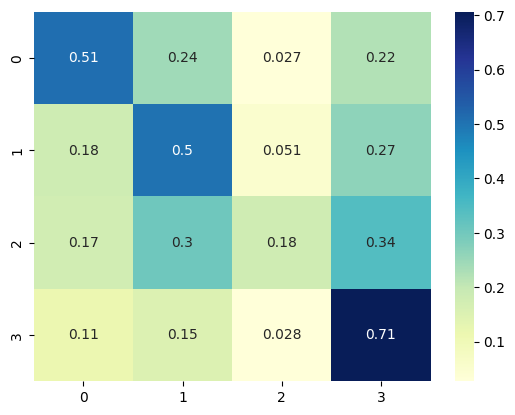

In [147]:
# Metrics predicting Train-Target
print('*** Model Evaluation: Predicting Train-Labels ***')
our_metrics(y_train, rf_rgs_y_train_pred)

*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4118
_____________________
Weighted Quadratic Kappa: 0.3378


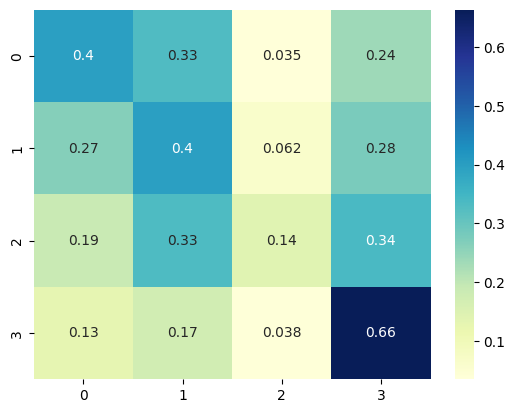

In [148]:
# Metrics predicting Train-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_test, rf_rgs_y_test_pred)

### RF Grid Search Kappa - Entire Data Set

In [149]:
# Hyperparameter grid based on hyperparameters of the default model for best kappa:

# defining kappa
kappa = get_kappa()

# setting hyperparameter grid:
param_grid = {
    'n_estimators': [500],
    'max_depth': [None] + list(np.arange(10, 28)),
    'max_features': [None] + list(np.arange(1,5)),
    'min_samples_split': np.linspace(20, 200, 10).astype(int),
    'min_samples_leaf': np.linspace(10, 100, 10).astype(int),
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model for best accuracy_score and 250 fits:
rf_rgs_kappa = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = kappa, cv = 5, 
                        n_iter = 50, verbose = 1, random_state=42)

# Fit best model estimated by random search to train data:
rf_rgs_kappa.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 22, 23, 24, 25, 26,
                                                      27],
                                        'max_features': [None, 1, 2, 3, 4],
                                        'min_samples_leaf': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'min_samples_split': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200]),
                                        'n_estimators': [500]},
                   random_state=42,
                   scoring=make_scorer(cohen_kappa_score, weights=quadratic),
                   verbose=1)

In [150]:
# check hyperparameters of best estimator:
rf_rgs_kappa.best_params_

{'n_estimators': 500,
 'min_samples_split': 60,
 'min_samples_leaf': 20,
 'max_features': 4,
 'max_depth': 25,
 'bootstrap': False}

In [151]:
# instantiate model with best estimators as found by random grid search accuracy
rf_rgs_kappa_model = rf_rgs_kappa.best_estimator_

# predict train-target
rf_rgs_y_train_pred = rf_rgs_kappa_model.predict(X_train)
# predict test-target
rf_rgs_y_test_pred = rf_rgs_kappa_model.predict(X_test)

# Average number of nodes and depths of trees in the forest
n_nodes = []
depths = []

for single_tree in rf_rgs_kappa_model.estimators_:
    n_nodes.append(single_tree.tree_.node_count)
    depths.append(single_tree.tree_.max_depth)

print('__________________________________')
print(f'Average number of nodes in the forest: {int(np.mean(n_nodes))}')
print('__________________________________')
print(f'Average depth trees in the forest: {int(np.mean(depths))}')
print(' ')
print(' ')

model_hyperparams(rf_rgs_kappa_model)

__________________________________
Average number of nodes in the forest: 357
__________________________________
Average depth trees in the forest: 14
 
 


,set hyperparameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,25
max_features,4
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,20


*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4869
_____________________
Weighted Quadratic Kappa: 0.4018


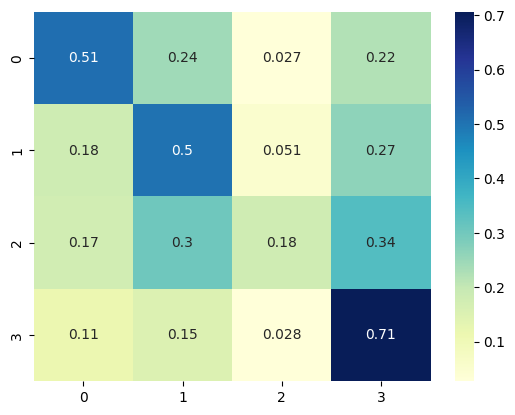

In [152]:
# Metrics predicting Train-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_train, rf_rgs_y_train_pred)

*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4118
_____________________
Weighted Quadratic Kappa: 0.3378


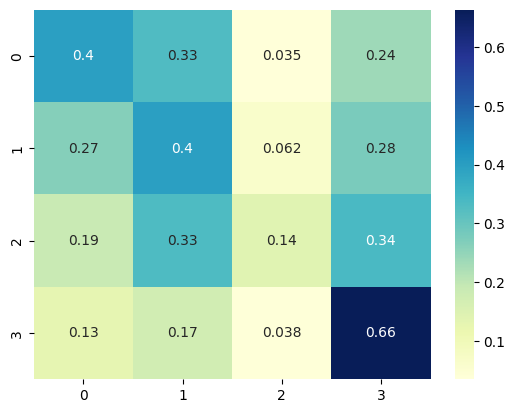

In [153]:
# Metrics predicting Test-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_test, rf_rgs_y_test_pred)

### RF Grid Search Accuracy: Entire Data Set
We decided to proceed with Cohens Kappa as our model metrics, because it suits the problem at hand better. Steps are hidden for better notebook readability

In [154]:
# Hyperparameter grid based on hyperparameters of the default model for best accuracy:

# setting hyperparameter grid:
param_grid = {
    'n_estimators': [500],
    'max_depth': [20, 21, 22],
    'max_features': [4],
    'min_samples_split': [49,50,51],
    'min_samples_leaf': [14, 15, 16],
    'bootstrap': [False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model for best accuracy_score and 250 fits:
rf_gs_acc = GridSearchCV(estimator, param_grid, n_jobs = -1, scoring = 'accuracy', cv = 5, verbose = 1)

# Fit best model estimated by random search to train data:
rf_gs_acc.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [20, 21, 22],
                         'max_features': [4], 'min_samples_leaf': [14, 15, 16],
                         'min_samples_split': [49, 50, 51],
                         'n_estimators': [500]},
             scoring='accuracy', verbose=1)

In [155]:
# check hyperparameters of best estimator:
rf_gs_acc.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 4,
 'min_samples_leaf': 15,
 'min_samples_split': 50,
 'n_estimators': 500}

In [156]:
# instantiate model with best estimators as found by grid search accuracy
rf_gs_acc_model = rf_gs_acc.best_estimator_

# predict train-target
rf_gs_y_train_pred = rf_gs_acc_model.predict(X_train)
# predict test-target
rf_gs_y_test_pred = rf_gs_acc_model.predict(X_test)

# Average number of nodes and depths of trees in the forest
n_nodes = []
depths = []

for single_tree in rf_gs_acc_model.estimators_:
    n_nodes.append(single_tree.tree_.node_count)
    depths.append(single_tree.tree_.max_depth)

print('__________________________________')
print(f'Average number of nodes in the forest: {int(np.mean(n_nodes))}')
print('__________________________________')
print(f'Average depth trees in the forest: {int(np.mean(depths))}')
print(' ')
print(' ')

model_hyperparams(rf_gs_acc_model)

__________________________________
Average number of nodes in the forest: 440
__________________________________
Average depth trees in the forest: 15
 
 


,set hyperparameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,20
max_features,4
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,15


*** Model Evaluation: Predicting Train-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.5071
_____________________
Weighted Quadratic Kappa: 0.4211


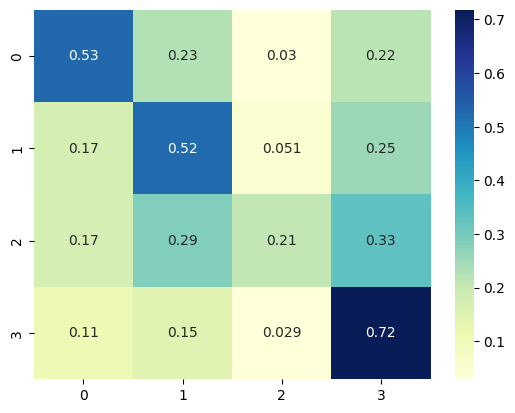

In [157]:
# Metrics predicting Train-Target
print('*** Model Evaluation: Predicting Train-Labels ***')
our_metrics(y_train, rf_gs_y_train_pred)

*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4149
_____________________
Weighted Quadratic Kappa: 0.3413


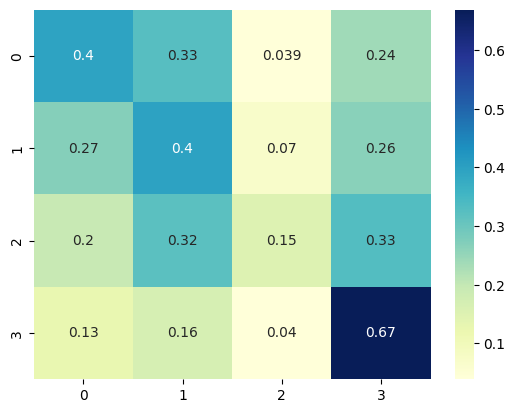

In [158]:
# Metrics predicting Test-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_test, rf_gs_y_test_pred)

### RF Grid Search I Kappa: Entire Data Set
The best model performance was achieved during the first iteration of grid search: Kappa on Test-Set: 0.3463 

In [159]:
# Hyperparameter grid based on hyperparameters of the default model for best accuracy:
#random grid search results
# {'n_estimators': 500,
#  'min_samples_split': 60,
#  'min_samples_leaf': 20,
#  'max_features': 4,
#  'max_depth': 25,
#  'bootstrap': False}

# setting hyperparameter grid:
param_grid = {
    'n_estimators': [500],
    'max_depth': [21, 23, 25],
    'max_features': [3, 4],
    'min_samples_split': [60, 62, 64],
    'min_samples_leaf': [20, 22, 24],
    'bootstrap': [False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model for best accuracy_score and 250 fits:
rf_gs_kappa = GridSearchCV(estimator, param_grid, n_jobs = -1, scoring = kappa, cv = 5, verbose = 1)

# Fit best model estimated by random search to train data:
rf_gs_kappa.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [21, 23, 25],
                         'max_features': [3, 4],
                         'min_samples_leaf': [20, 22, 24],
                         'min_samples_split': [60, 62, 64],
                         'n_estimators': [500]},
             scoring=make_scorer(cohen_kappa_score, weights=quadratic),
             verbose=1)

In [160]:
# check hyperparameters of best estimator:
rf_gs_kappa.best_params_

{'bootstrap': False,
 'max_depth': 21,
 'max_features': 3,
 'min_samples_leaf': 20,
 'min_samples_split': 62,
 'n_estimators': 500}

In [161]:
# instantiate model with best estimators as found by grid search kappa
rf_gs_kappa_model = rf_gs_kappa.best_estimator_

# predict train-target
rf_gs_y_train_pred = rf_gs_kappa_model.predict(X_train)
# predict test-target
rf_gs_y_test_pred = rf_gs_kappa_model.predict(X_test)

# Average number of nodes and depths of trees in the forest
n_nodes = []
depths = []

for single_tree in rf_gs_kappa_model.estimators_:
    n_nodes.append(single_tree.tree_.node_count)
    depths.append(single_tree.tree_.max_depth)

print('__________________________________')
print(f'Average number of nodes in the forest: {int(np.mean(n_nodes))}')
print('__________________________________')
print(f'Average depth trees in the forest: {int(np.mean(depths))}')
print(' ')
print(' ')

model_hyperparams(rf_gs_kappa_model)

__________________________________
Average number of nodes in the forest: 300
__________________________________
Average depth trees in the forest: 14
 
 


,set hyperparameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,21
max_features,3
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,20


*** Model Evaluation: Predicting Train-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4719
_____________________
Weighted Quadratic Kappa: 0.3848


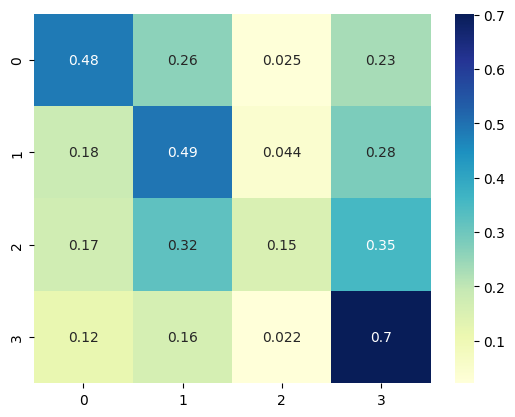

In [162]:
# Metrics predicting Train-Target
print('*** Model Evaluation: Predicting Train-Labels ***')
our_metrics(y_train, rf_gs_y_train_pred)

*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4084
_____________________
Weighted Quadratic Kappa: 0.3463


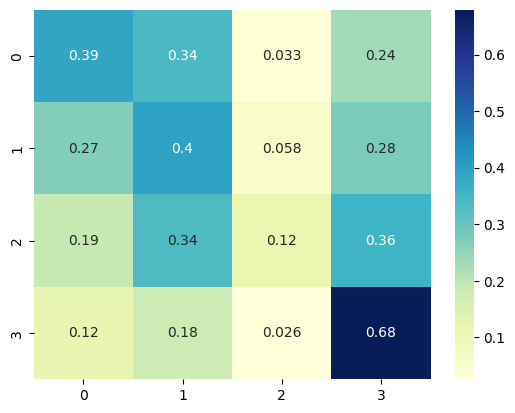

In [163]:
# Metrics predicting Test-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_test, rf_gs_y_test_pred)

# Feature Importance Combined Dataset
3 Most important features for combined set: age, description length, photo amount

In [164]:
# feature importance 
features = X_train.columns.tolist()

# data frame with feature names and feature importance scores, sorted by importance
feature_importance_best_combi = pd.DataFrame({'feature': features,
                    'importance': rf_gs_kappa_model.feature_importances_}).sort_values('importance', ascending = False)
# show 10 most important features
feature_importance_best_combi.head(5)

,feature,importance
20,age_bin,0.244146
19,photoamt_11,0.128523
21,description_char,0.124876
2,sterilized,0.101362
4,vaccinated_dewormed,0.056951


### RF Grid Search II Kappa: Entire Data Set
the model did not increase in a second round of grid search, steps are hidden for better notebook readability

In [165]:
# # Hyperparameter grid based on hyperparameters of the default model for best accuracy:
# # grid search I results
# # {'bootstrap': False,
# #  'max_depth': 21,
# #  'max_features': 4,
# #  'min_samples_leaf': 22,
# #  'min_samples_split': 62,
# #  'n_estimators': 500}

# # setting hyperparameter grid:
# param_grid = {
#     'n_estimators': [500],
#     'max_depth': [17, 19, 21],
#     'max_features': [3, 4],
#     'min_samples_split': [58, 60],
#     'min_samples_leaf': [18, 19, 20],
#     'bootstrap': [False]
# }

# # Estimator for use in random search
# estimator = RandomForestClassifier(random_state = 42)

# # Create the random search model for best accuracy_score and 250 fits:
# rf_gs_kappa = GridSearchCV(estimator, param_grid, n_jobs = -1, scoring = kappa, cv = 5, verbose = 1)

# # Fit best model estimated by random search to train data:
# rf_gs_kappa.fit(X_train, y_train)

In [166]:
# # check hyperparameters of best estimator:
# rf_gs_kappa.best_params_

In [167]:
# # instantiate model with best estimators as found by grid search kappa
# rf_gs_kappa_model = rf_gs_kappa.best_estimator_

# # predict train-target
# rf_gs_y_train_pred = rf_gs_kappa_model.predict(X_train)
# # predict test-target
# rf_gs_y_test_pred = rf_gs_kappa_model.predict(X_test)

# # Average number of nodes and depths of trees in the forest
# n_nodes = []
# depths = []

# for single_tree in rf_gs_kappa_model.estimators_:
#     n_nodes.append(single_tree.tree_.node_count)
#     depths.append(single_tree.tree_.max_depth)

# print('__________________________________')
# print(f'Average number of nodes in the forest: {int(np.mean(n_nodes))}')
# print('__________________________________')
# print(f'Average depth trees in the forest: {int(np.mean(depths))}')
# print(' ')
# print(' ')

# model_hyperparams(rf_gs_kappa_model)

In [168]:
# # Metrics predicting Train-Target
# print('*** Model Evaluation: Predicting Train-Labels ***')
# our_metrics(y_train, rf_gs_y_train_pred)

In [169]:
# # Metrics predicting Test-Target
# print('*** Model Evaluation: Predicting Test-Labels ***')
# our_metrics(y_test, rf_gs_y_test_pred)

### Combine Target into 3 Categories (merge cat. 2 and 3 into one single category)
The model performance could not be increased, this method lead to an imbalanced target distribution (overrepresenting the newly combined category). We decided to not further pursue this part. Steps are hidden for better notebook readability. 

In [170]:
# combine Target 2 and 3 (3 categories)
y_train_3 = [2 if x == 3 else x for x in y_train]
y_test_3 = [2 if x == 3 else x for x in y_test]

In [171]:
# check if that worked
unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)

[1 2 3 4] [2077 2372 1914 2310]


In [172]:
# # fit model as found in grid search to new target
# rf_gs_model_3 = rf_gs_acc.best_estimator_
# rf_gs_model_3.fit(X_train, y_train_3)

In [173]:
# # predict train-target
# rf_gs_y_train_3_pred = rf_gs_model_3.predict(X_train)

# # Metrics predicting Train-Target
# print('*** Model Evaluation: Predicting Train-Labels ***')
# our_metrics(y_train_3, rf_gs_y_train_3_pred)


In [174]:
# # predict Test-Target
# rf_gs_y_test_3_pred = rf_gs_model_3.predict(X_test)

# # Metrics predicting Test-Target
# print('*** Model Evaluation: Predicting Test-Labels ***')
# our_metrics(y_test_3, rf_gs_y_test_3_pred)

# Modeling Dogs Separately

In [175]:
# read in dogs features and target (4 categories)
X_train_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_dogs_all.csv')
y_train_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train_dogs.csv')

X_test_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_dogs_all.csv')
y_test_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test_dogs.csv')

# turn target df into 1D-array
y_train_dogs = y_train_dogs.values.ravel()
y_test_dogs = y_test_dogs.values.ravel()  

In [176]:
X_test_dogs.columns

Index(['gender', 'sterilized', 'breed_type', 'vaccinated_dewormed', 'fee_bin',
       'maturitysize_0', 'maturitysize_1', 'maturitysize_2', 'maturitysize_3',
       'furlength_0', 'furlength_1', 'furlength_2', 'health_0', 'health_1',
       'health_2', 'color_pattern_0', 'color_pattern_1', 'color_pattern_2',
       'photoamt_11', 'age_bin', 'description_char'],
      dtype='object')

### RF Default Model - Dogs

In [177]:
# instantiate and fit the default RFC on dogs
rf_def_dogs = RandomForestClassifier()
rf_def_dogs.fit(X_train_dogs, y_train_dogs)

# predict train-target
rf_def_dogs_y_train_pred = rf_def_dogs.predict(X_train_dogs)
# predict test-target
rf_def_dogs_y_test_pred = rf_def_dogs.predict(X_test_dogs)

# Average number of nodes and depths of trees in the forest
n_nodes = []
depths = []

for single_tree in rf_def_dogs.estimators_:
    n_nodes.append(single_tree.tree_.node_count)
    depths.append(single_tree.tree_.max_depth)

print('__________________________________')
print(f'Average number of nodes in the forest: {int(np.mean(n_nodes))}')
print('__________________________________')
print(f'Average depth trees in the forest: {int(np.mean(depths))}')
print(' ')
print(' ')

model_hyperparams(rf_def_dogs)

__________________________________
Average number of nodes in the forest: 4546
__________________________________
Average depth trees in the forest: 26
 
 


,set hyperparameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9861
_____________________
Weighted Quadratic Kappa: 0.9884


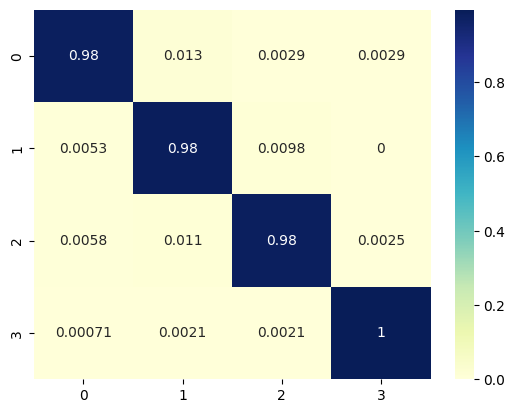

In [178]:
# Metrics predicting Train-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_train_dogs, rf_def_dogs_y_train_pred)

*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.378
_____________________
Weighted Quadratic Kappa: 0.2928


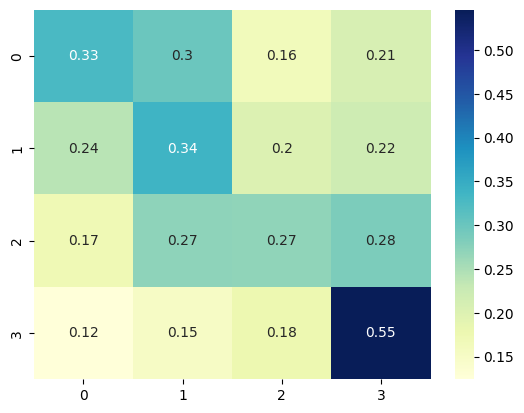

In [179]:
# Metrics predicting Test-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_test_dogs, rf_def_dogs_y_test_pred)

### RF Random Grid Search - Dogs

In [180]:
# Hyperparameter grid based on hyperparameters of the default model for dogs best accuracy:

# make kappa-scorer
kappa = get_kappa()

# setting hyperparameter grid:
param_grid = {
    'n_estimators': [500],
    'max_depth': list(np.arange(18, 26)),
    'max_features': [None] + list(np.arange(1, 4)),
    'min_samples_split': np.linspace(20, 200, 10).astype(int),
    'min_samples_leaf': np.linspace(10, 100, 10).astype(int),
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model for best accuracy_score and 250 fits:
rf_rgs_kappa_dogs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = kappa, cv = 5, 
                        n_iter = 50, verbose = 1, random_state=42)

# Fit best model estimated by random search to train data:
rf_rgs_kappa_dogs.fit(X_train_dogs, y_train_dogs)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [18, 19, 20, 21, 22, 23,
                                                      24, 25],
                                        'max_features': [None, 1, 2, 3],
                                        'min_samples_leaf': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'min_samples_split': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200]),
                                        'n_estimators': [500]},
                   random_state=42,
                   scoring=make_scorer(cohen_kappa_score, weights=quadratic),
                   verbose=1)

In [181]:
# # check hyperparameters of best estimator:
rf_rgs_kappa_dogs.best_params_

{'n_estimators': 500,
 'min_samples_split': 80,
 'min_samples_leaf': 40,
 'max_features': None,
 'max_depth': 24,
 'bootstrap': True}

In [182]:
# instantiate model with best estimators as found by random grid search kappa
rf_rgs_kappa_dogs_model = rf_rgs_kappa_dogs.best_estimator_

# predict train-target
rf_rgs_y_train_pred_dogs = rf_rgs_kappa_dogs_model.predict(X_train_dogs)
# predict test-target
rf_rgs_y_test_pred_dogs = rf_rgs_kappa_dogs_model.predict(X_test_dogs)

# Average number of nodes and depths of trees in the forest
n_nodes = []
depths = []

for single_tree in rf_rgs_kappa_dogs_model.estimators_:
    n_nodes.append(single_tree.tree_.node_count)
    depths.append(single_tree.tree_.max_depth)

print('__________________________________')
print(f'Average number of nodes in the forest: {int(np.mean(n_nodes))}')
print('__________________________________')
print(f'Average depth trees in the forest: {int(np.mean(depths))}')
print(' ')
print(' ')

model_hyperparams(rf_rgs_kappa_dogs_model)

__________________________________
Average number of nodes in the forest: 117
__________________________________
Average depth trees in the forest: 10
 
 


,set hyperparameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,24
max_features,None
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,40


*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4674
_____________________
Weighted Quadratic Kappa: 0.3904


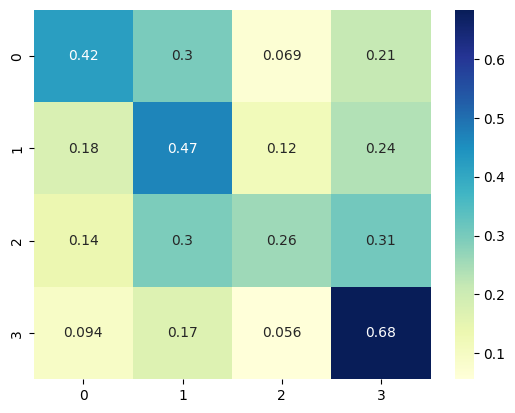

In [183]:
# Metrics predicting Train-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_train_dogs, rf_rgs_y_train_pred_dogs)

*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.41
_____________________
Weighted Quadratic Kappa: 0.3192


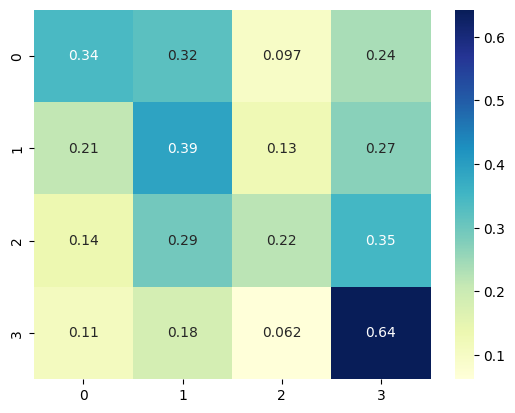

In [184]:
# Metrics predicting Test-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_test_dogs, rf_rgs_y_test_pred_dogs)

### RF Grid Search Dogs
best model with hypeparameters found with grid search: Weighted Quadratic Kappa: 0.3307

In [185]:
# Hyperparameter grid based on hyperparameters of the randomly found model for best kappa:
# random grid search results
# {'n_estimators': 500,
#  'min_samples_split': 80,
#  'min_samples_leaf': 40,
#  'max_features': None,
#  'max_depth': 24,
#  'bootstrap': True}

# setting hyperparameter grid:
param_grid = {
    'n_estimators': [500],
    'max_depth': [12, 14, 16],
    'max_features': [None],
    'min_samples_split': [20, 30, 40, 50, 60, 70],
    'min_samples_leaf': [10, 15, 20, 25],
    'bootstrap': [True]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model for best accuracy_score and 250 fits:
rf_gs_kappa_dogs = GridSearchCV(estimator, param_grid, n_jobs = -1, scoring = kappa, cv = 5, verbose = 1)

# Fit best model estimated by random search to train data:
rf_gs_kappa_dogs.fit(X_train_dogs, y_train_dogs)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [12, 14, 16],
                         'max_features': [None],
                         'min_samples_leaf': [10, 15, 20, 25],
                         'min_samples_split': [20, 30, 40, 50, 60, 70],
                         'n_estimators': [500]},
             scoring=make_scorer(cohen_kappa_score, weights=quadratic),
             verbose=1)

In [186]:
# check hyperparameters of best estimator:
rf_gs_kappa_dogs.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 60,
 'n_estimators': 500}

In [187]:
# instantiate model with best estimators as found by random grid search kappa
rf_gs_kappa_dogs_model = rf_gs_kappa_dogs.best_estimator_

# predict train-target
rf_gs_y_train_pred_dogs = rf_gs_kappa_dogs_model.predict(X_train_dogs)
# predict test-target
rf_gs_y_test_pred_dogs = rf_gs_kappa_dogs_model.predict(X_test_dogs)

# Average number of nodes and depths of trees in the forest
n_nodes = []
depths = []

for single_tree in rf_gs_kappa_dogs_model.estimators_:
    n_nodes.append(single_tree.tree_.node_count)
    depths.append(single_tree.tree_.max_depth)

print('__________________________________')
print(f'Average number of nodes in the forest: {int(np.mean(n_nodes))}')
print('__________________________________')
print(f'Average depth trees in the forest: {int(np.mean(depths))}')
print(' ')
print(' ')

model_hyperparams(rf_gs_kappa_dogs_model)

__________________________________
Average number of nodes in the forest: 183
__________________________________
Average depth trees in the forest: 11
 
 


,set hyperparameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,12
max_features,None
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,10


*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.5115
_____________________
Weighted Quadratic Kappa: 0.4305


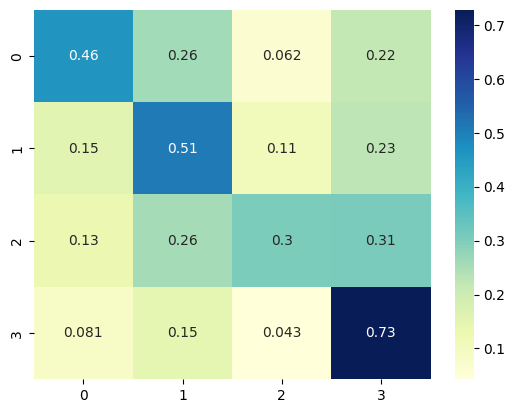

In [188]:
# Metrics predicting Train-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_train_dogs, rf_gs_y_train_pred_dogs)

*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4112
_____________________
Weighted Quadratic Kappa: 0.3376


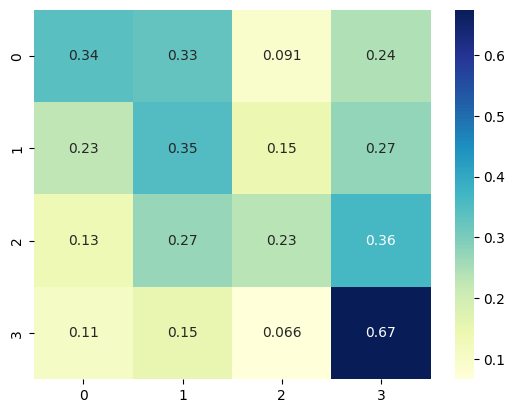

In [189]:
# Metrics predicting Train-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_test_dogs, rf_gs_y_test_pred_dogs)

# Feature Importance Dogs
4 most important features for dogs: description length, breed type, age, photo amount

In [190]:
# feature importance 
features = X_train_dogs.columns.tolist()

# data frame with feature names and feature importance scores, sorted by importance
feature_importance_best_dogs = pd.DataFrame({'feature': features,
                    'importance': rf_gs_kappa_dogs_model.feature_importances_}).sort_values('importance', ascending = False)
# show 10 most important features
feature_importance_best_dogs.head(4)

,feature,importance
20,description_char,0.294779
2,breed_type,0.176183
19,age_bin,0.160763
18,photoamt_11,0.118409


# Modeling Cats Separately

### Random Forest Default Model - Cats

In [191]:
# read in dogs features and target (4 categories)
X_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_cats_all.csv')
y_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train_cats.csv')

X_test_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_cats_all.csv')
y_test_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test_cats.csv')

# turn target df into 1D-array
y_train_cats = y_train_cats.values.ravel()
y_test_cats = y_test_cats.values.ravel()  

In [192]:
# instantiate and fit the default RFC on cats
rf_def_cats = RandomForestClassifier()
rf_def_cats.fit(X_train_cats, y_train_cats)

# predict train-target
rf_def_cats_y_train_pred = rf_def_cats.predict(X_train_cats)
# predict test-target
rf_def_cats_y_test_pred = rf_def_cats.predict(X_test_cats)

# Average number of nodes and depths of trees in the forest
n_nodes = []
depths = []

for single_tree in rf_def_cats.estimators_:
    n_nodes.append(single_tree.tree_.node_count)
    depths.append(single_tree.tree_.max_depth)

print('__________________________________')
print(f'Average number of nodes in the forest: {int(np.mean(n_nodes))}')
print('__________________________________')
print(f'Average depth trees in the forest: {int(np.mean(depths))}')
print(' ')
print(' ')

model_hyperparams(rf_def_cats)

__________________________________
Average number of nodes in the forest: 3540
__________________________________
Average depth trees in the forest: 25
 
 


,set hyperparameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9981
_____________________
Weighted Quadratic Kappa: 0.9978


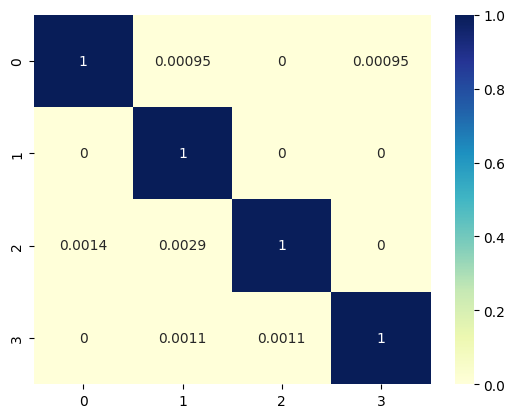

In [193]:
# Metrics predicting Test-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_train_cats, rf_def_cats_y_train_pred)

*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3528
_____________________
Weighted Quadratic Kappa: 0.2081


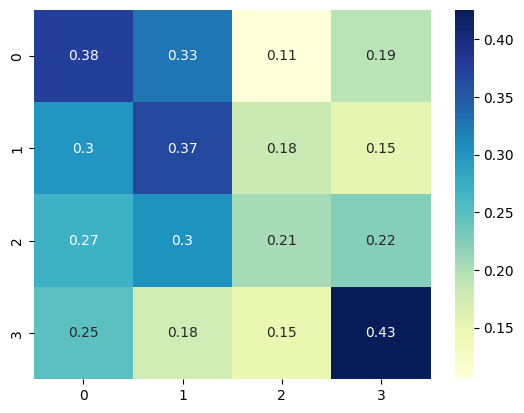

In [194]:
# Metrics predicting Test-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_test_cats, rf_def_cats_y_test_pred)

### RF Random Grid Search Cats
the model with hyperparameters after random grid search performed best: Weighted Quadratic Kappa: 0.3056
grid search steps are hidden to improve readability

In [195]:
# Hyperparameter grid based on hyperparameters of the default model for cats best accuracy:

# defining kappa scorer
kappa = get_kappa()

# setting hyperparameter grid:
param_grid = {
    'n_estimators': [500],
    'max_depth': list(np.arange(8, 25)),
    'max_features': [None] + list(np.arange(1,4)),
    'min_samples_split': np.linspace(20, 200, 10).astype(int),
    'min_samples_leaf': np.linspace(10, 100, 10).astype(int),
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model for best accuracy_score and 250 fits:
rf_rgs_kappa_cats = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = kappa, cv = 5, 
                        n_iter = 50, verbose = 1, random_state=42)

# Fit best model estimated by random search to train data:
rf_rgs_kappa_cats.fit(X_train_cats, y_train_cats)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 22, 23, 24],
                                        'max_features': [None, 1, 2, 3],
                                        'min_samples_leaf': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'min_samples_split': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200]),
                                        'n_estimators': [500]},
                   random_state=42,
                   scoring=make_scorer(cohen_kappa_score, weights=quadratic),
                   verbose=1)

In [196]:
# check hyperparameters of best estimator:
rf_rgs_kappa_cats.best_params_

{'n_estimators': 500,
 'min_samples_split': 200,
 'min_samples_leaf': 10,
 'max_features': 3,
 'max_depth': 21,
 'bootstrap': False}

In [197]:
# instantiate model with best estimators as found by grid search accuracy
rf_rgs_kappa_cats_model = rf_rgs_kappa_cats.best_estimator_

# predict train-target
rf_rgs_y_train_pred_cats = rf_rgs_kappa_cats_model.predict(X_train_cats)
# predict test-target
rf_rgs_y_test_pred_cats = rf_rgs_kappa_cats_model.predict(X_test_cats)

# Average number of nodes and depths of trees in the forest
n_nodes = []
depths = []

for single_tree in rf_rgs_acc_cats_model.estimators_:
    n_nodes.append(single_tree.tree_.node_count)
    depths.append(single_tree.tree_.max_depth)

print('__________________________________')
print(f'Average number of nodes in the forest: {int(np.mean(n_nodes))}')
print('__________________________________')
print(f'Average depth trees in the forest: {int(np.mean(depths))}')
print(' ')
print(' ')

model_hyperparams(rf_rgs_kappa_cats_model)

__________________________________
Average number of nodes in the forest: 108
__________________________________
Average depth trees in the forest: 11
 
 


,set hyperparameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,21
max_features,3
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,10


*** Model Evaluation: Predicting Train-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4311
_____________________
Weighted Quadratic Kappa: 0.3312


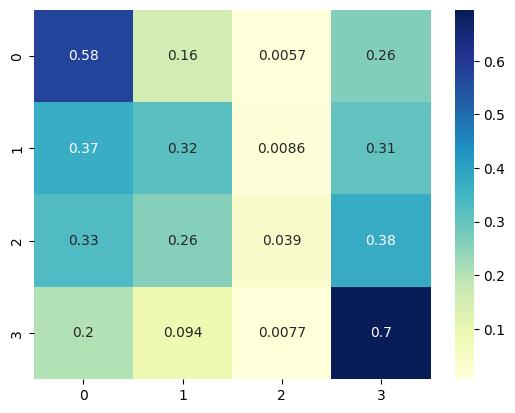

In [198]:
# Metrics predicting Test-Target
print('*** Model Evaluation: Predicting Train-Labels ***')
our_metrics(y_train_cats, rf_rgs_y_train_pred_cats)

*** Model Evaluation: Predicting Test-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4029
_____________________
Weighted Quadratic Kappa: 0.3056


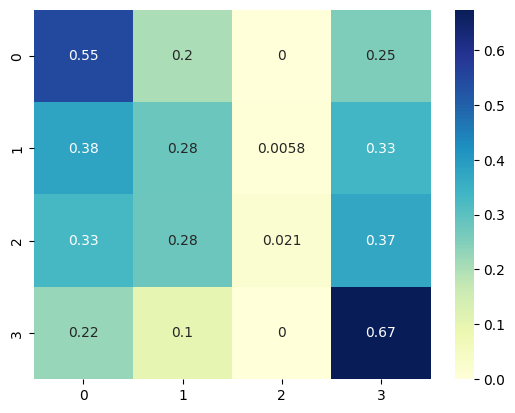

In [199]:
# Metrics predicting Test-Target
print('*** Model Evaluation: Predicting Test-Labels ***')
our_metrics(y_test_cats, rf_rgs_y_test_pred_cats)

# Feature Importance Cats
4 most important features for cats: age, photo amount, description length, sterilized

In [200]:
# feature importance 
features = X_train_cats.columns.tolist()

# data frame with feature names and feature importance scores, sorted by importance
feature_importance_best_cats = pd.DataFrame({'feature': features,
                    'importance': rf_rgs_kappa_cats_model.feature_importances_}).sort_values('importance', ascending = False)
# show 10 most important features
feature_importance_best_cats.head(4)

,feature,importance
19,age_bin,0.329433
18,photoamt_11,0.146171
20,description_char,0.118446
1,sterilized,0.114042


### RF Grid Search Cats

In [201]:
# Hyperparameter grid based on hyperparameters of the randomly found model for best kappa:
# random grid search results
# {'n_estimators': 500,
#  'min_samples_split': 200,
#  'min_samples_leaf': 10,
#  'max_features': 3,
#  'max_depth': 21,
#  'bootstrap': False}

# setting hyperparameter grid:
param_grid = {
    'n_estimators': [500],
    'max_depth': [17, 18, 19, 20, 21],
    'max_features': [None],
    'min_samples_split': [200, 250, 300],
    'min_samples_leaf': [10, 25, 50, 100],
    'bootstrap': [False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model for best accuracy_score and 250 fits:
rf_gs_kappa_cats = GridSearchCV(estimator, param_grid, n_jobs = -1, scoring = kappa, cv = 5, verbose = 1)

# Fit best model estimated by random search to train data:
rf_gs_kappa_cats.fit(X_train_cats, y_train_cats)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_depth': [17, 18, 19, 20, 21],
                         'max_features': [None],
                         'min_samples_leaf': [10, 25, 50, 100],
                         'min_samples_split': [200, 250, 300],
                         'n_estimators': [500]},
             scoring=make_scorer(cohen_kappa_score, weights=quadratic),
             verbose=1)

In [202]:
# check hyperparameters of best estimator:
rf_gs_kappa_cats.best_params_

{'bootstrap': False,
 'max_depth': 17,
 'max_features': None,
 'min_samples_leaf': 25,
 'min_samples_split': 250,
 'n_estimators': 500}

In [203]:
# instantiate model with best estimators as found by grid search accuracy
rf_gs_kappa_cats_model = rf_gs_kappa_cats.best_estimator_

# predict train-target
rf_gs_y_train_pred_cats = rf_gs_kappa_cats_model.predict(X_train_cats)
# predict test-target
rf_gs_y_test_pred_cats = rf_gs_kappa_cats_model.predict(X_test_cats)

# Average number of nodes and depths of trees in the forest
n_nodes = []
depths = []

for single_tree in rf_gs_kappa_cats_model.estimators_:
    n_nodes.append(single_tree.tree_.node_count)
    depths.append(single_tree.tree_.max_depth)

print('__________________________________')
print(f'Average number of nodes in the forest: {int(np.mean(n_nodes))}')
print('__________________________________')
print(f'Average depth trees in the forest: {int(np.mean(depths))}')
print(' ')
print(' ')

model_hyperparams(rf_gs_kappa_cats_model)

__________________________________
Average number of nodes in the forest: 53
__________________________________
Average depth trees in the forest: 10
 
 


,set hyperparameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,17
max_features,None
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,25


*** Model Evaluation: Predicting Train-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.4079
_____________________
Weighted Quadratic Kappa: 0.3081


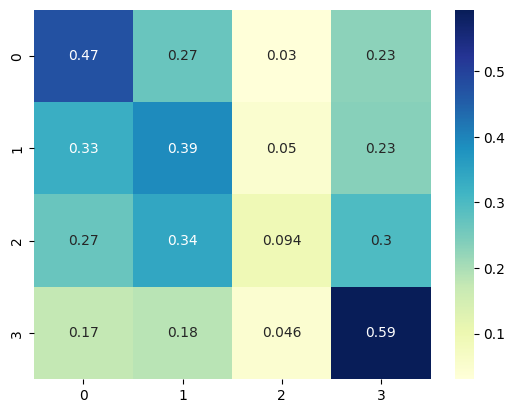

In [204]:
# Metrics predicting Test-Target
print('*** Model Evaluation: Predicting Train-Labels ***')
our_metrics(y_train_cats, rf_gs_y_train_pred_cats)

*** Model Evaluation: Predicting Train-Labels ***
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3689
_____________________
Weighted Quadratic Kappa: 0.2496


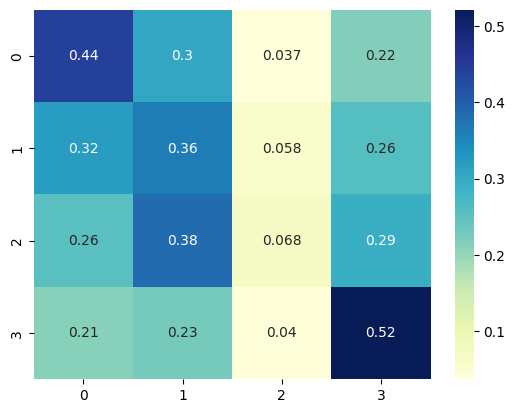

In [205]:
# Metrics predicting Test-Target
print('*** Model Evaluation: Predicting Train-Labels ***')
our_metrics(y_test_cats, rf_gs_y_test_pred_cats)

### Evaluating Cats and Dogs Models

**********************************************************************
Weighted Quadratic Kappa for Cats:                0.3056 
(Accuracy for Cats: 0.4029)
**********************************************************************
Weighted Quadratic Kappa for Dogs:                0.3376 
(Accuracy for Dogs: 0.4112)
**********************************************************************
**********************************************************************
Combined Kappa: 0.3301830319263436
(Combined Accuracy: 0.40767634854771784)


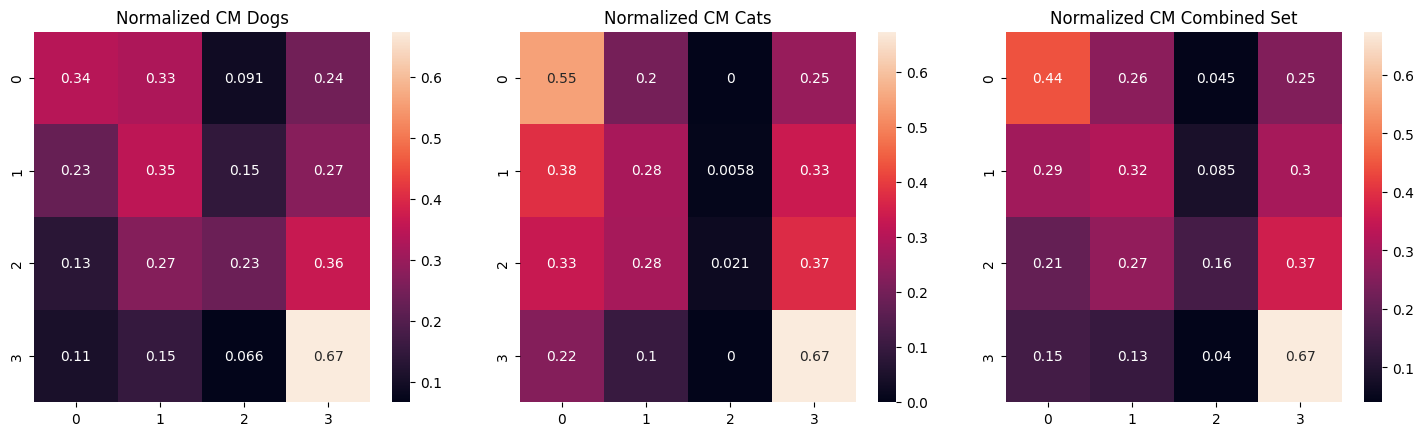

In [206]:
cat_dog_metrics(y_test_dogs, rf_gs_y_test_pred_dogs, y_test_cats, rf_rgs_y_test_pred_cats)